In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset



Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
car-vs-bike-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/car-vs-bike-classification-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 0052cb267268c59e.jpg   Car-Bike-Dataset
 027b71cacc5bf95e.jpg   car-vs-bike-classification-dataset.zip
'Bike (1000).jpeg'      images
'Bike (1006).jpeg'      kaggle.json
'Car (1006).jpeg'       lions-or-cheetahs-image-classification.zip
'Car (100).jpeg'        sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
bike_files = os.listdir('/content/Car-Bike-Dataset/Bike')

# Now print 'bike'
print(bike_files[0:5])  # Print the first 5 files
print(bike_files[-5:])  # Print the last 5 files


['Bike (91).jpeg', 'Bike (533).jpeg', 'Bike (263).jpeg', 'Bike (465).jpeg', 'Bike (298).jpeg']
['images (2).jpeg', 'Bike (413).jpeg', 'Bike (701).jpeg', 'Bike (999).jpeg', 'Bike (1365).jpeg']


In [9]:
car_files = os.listdir('/content/Car-Bike-Dataset/Car')
print(car_files[0:5])
print(car_files[-5:])

['Car (289).jpeg', 'Car (1241).jpeg', 'Car (897).jpeg', 'Car (698).jpeg', 'Car (1635).jpeg']
['Car (1727).jpeg', 'Car (1540).jpeg', 'Car (507).jpeg', 'Car (1).png', 'Car (1233).jpeg']


In [10]:
print('Number of bike images:', len(bike_files))
print('Number of car images:', len(car_files))

Number of bike images: 2000
Number of car images: 2000


**Creating Labels for the two class of Images**

*bike-->  1

cars  -->  0

In [11]:
# create the labels
bike_labels = [1]*2000

car_labels = [0]*2000

In [12]:
print(bike_labels[0:5])

print(car_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(bike_labels))
print(len(car_labels))

2000
2000


In [14]:
labels = bike_labels + car_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

4000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

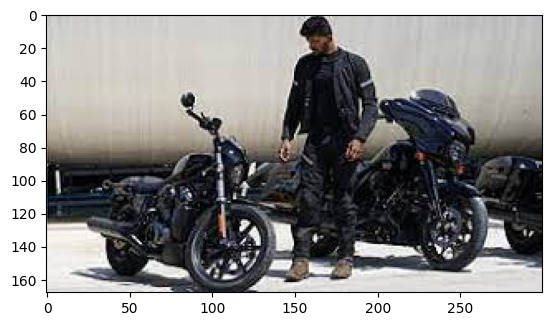

In [15]:
# displaying bike image
img = mpimg.imread('/content/Bike (1000).jpeg')
imgplot = plt.imshow(img)
plt.show()

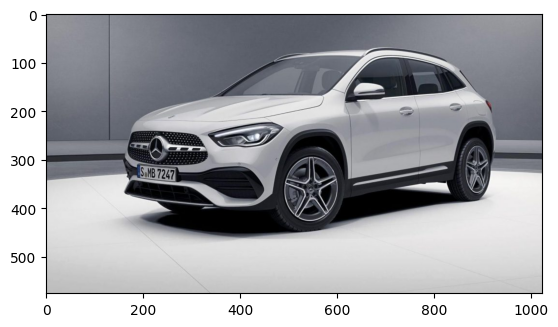

In [16]:
# displaying car image
img = mpimg.imread('/content/Car (1006).jpeg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [31]:
bike_path = '/content/Car-Bike-Dataset/Bike'
car_path = '/content/Car-Bike-Dataset/Car'

data = []

# Convert cheetah images to numpy arrays
bike_files = os.listdir(bike_path)  # Make sure Cheetahs_files is defined

for img_file in bike_files:
    image_path = os.path.join(bike_path, img_file)  # Correctly join path and file name
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Convert lion images to numpy arrays
car_files = os.listdir(car_path)  # Ensure lions_files is also defined

for img_file in car_files:
    image_path = os.path.join(car_path, img_file)  # Correctly join path and file name
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


In [32]:
type(data)

list

In [33]:
len(data)

4000

array([[[130, 133, 140],
        [133, 136, 143],
        [138, 141, 148],
        ...,
        [150, 149, 145],
        [152, 151, 147],
        [158, 157, 153]],

       [[129, 132, 139],
        [133, 136, 143],
        [137, 140, 147],
        ...,
        [152, 151, 147],
        [152, 151, 147],
        [158, 157, 153]],

       [[129, 132, 139],
        [132, 135, 142],
        [136, 139, 146],
        ...,
        [152, 151, 147],
        [154, 153, 149],
        [158, 157, 153]],

       ...,

       [[199, 198, 196],
        [197, 196, 194],
        [201, 200, 198],
        ...,
        [177, 176, 172],
        [176, 175, 171],
        [178, 177, 173]],

       [[198, 197, 195],
        [200, 199, 197],
        [203, 202, 200],
        ...,
        [180, 179, 175],
        [186, 185, 181],
        [175, 174, 170]],

       [[198, 197, 195],
        [203, 202, 200],
        [204, 203, 201],
        ...,
        [176, 175, 171],
        [178, 177, 173],
        [174, 173, 169]]], dtype=uint8)
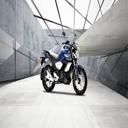

In [34]:
data[0]

In [35]:
type(data[0])

numpy.ndarray

In [36]:
data[0].shape

(128, 128, 3)

In [37]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [39]:
type(Y)

numpy.ndarray

In [40]:
print(X.shape)
print(Y.shape)

(4000, 128, 128, 3)
(4000,)


In [41]:
print(Y)

[1 1 1 ... 0 0 0]


In [42]:
#Y = Y[:2100]

**Train Test Split**

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(4000, 128, 128, 3) (3200, 128, 128, 3) (800, 128, 128, 3)


In [45]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[154, 156, 155],
        [169, 171, 170],
        [144, 146, 145],
        ...,
        [194, 194, 196],
        [168, 168, 170],
        [188, 188, 190]],

       [[162, 164, 163],
        [169, 171, 170],
        [134, 136, 135],
        ...,
        [206, 206, 208],
        [195, 195, 197],
        [204, 204, 206]],

       [[118, 120, 119],
        [130, 132, 131],
        [111, 113, 112],
        ...,
        [215, 215, 217],
        [213, 213, 215],
        [210, 210, 212]],

       ...,

       [[197, 192, 189],
        [197, 192, 189],
        [197, 192, 189],
        ...,
        [185, 184, 180],
        [182, 181, 177],
        [182, 181, 177]],

       [[193, 188, 185],
        [193, 188, 185],
        [193, 188, 185],
        ...,
        [175, 174, 170],
        [173, 172, 168],
        [175, 174, 170]],

       [[187, 182, 179],
        [190, 185, 182],
        [192, 187, 184],
        ...,
        [178, 178, 175],
        [174, 173, 171],
        [177, 177, 174]]], dtype=uint8)
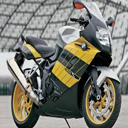

In [46]:
X_train[0]

In [47]:
X_train_scaled[0]

array([[[0.60392157, 0.61176471, 0.60784314],
        [0.6627451 , 0.67058824, 0.66666667],
        [0.56470588, 0.57254902, 0.56862745],
        ...,
        [0.76078431, 0.76078431, 0.76862745],
        [0.65882353, 0.65882353, 0.66666667],
        [0.7372549 , 0.7372549 , 0.74509804]],

       [[0.63529412, 0.64313725, 0.63921569],
        [0.6627451 , 0.67058824, 0.66666667],
        [0.5254902 , 0.53333333, 0.52941176],
        ...,
        [0.80784314, 0.80784314, 0.81568627],
        [0.76470588, 0.76470588, 0.77254902],
        [0.8       , 0.8       , 0.80784314]],

       [[0.4627451 , 0.47058824, 0.46666667],
        [0.50980392, 0.51764706, 0.51372549],
        [0.43529412, 0.44313725, 0.43921569],
        ...,
        [0.84313725, 0.84313725, 0.85098039],
        [0.83529412, 0.83529412, 0.84313725],
        [0.82352941, 0.82352941, 0.83137255]],

       ...,

       [[0.77254902, 0.75294118, 0.74117647],
        [0.77254902, 0.75294118, 0.74117647],
        [0.77254902, 0

**Building a Convolutional Neural Networks (CNN)**

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - acc: 0.5754 - loss: 0.9324 - val_acc: 0.8500 - val_loss: 0.3424
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8678 - loss: 0.3347 - val_acc: 0.9219 - val_loss: 0.2092
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9239 - loss: 0.2014 - val_acc: 0.9344 - val_loss: 0.1761
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9492 - loss: 0.1453 - val_acc: 0.9156 - val_loss: 0.2165
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9606 - loss: 0.0970 - val_acc: 0.9187 - val_loss: 0.2101


**Model Evaluation**

In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9443 - loss: 0.1644
Test Accuracy = 0.9375


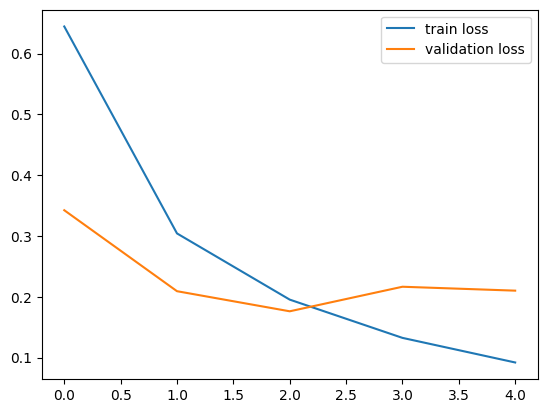

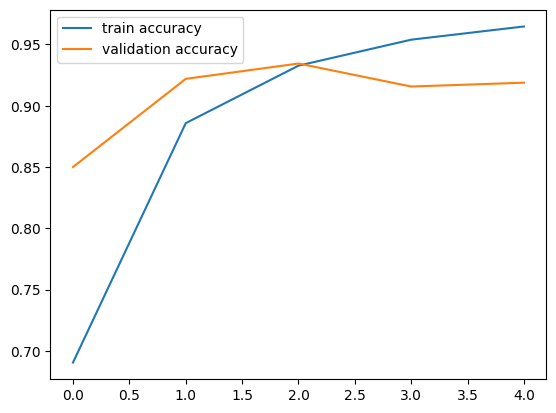

In [53]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/Car (100).jpeg


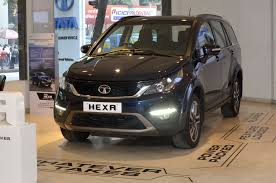

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
[[0.849192   0.04873656]]
0
itis car


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('itis bike')

if input_pred_label == 0:

  print('itis car')